# Phase 3 Code Challenge Review

Made using resources from the Seattle team - thanks y'all.

## Overview

* Gradient Descent
* Logistic Regression
* Classification Metrics
* Decision Trees

In [4]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.tree import export_graphviz
# import graphviz

In [5]:
# from src.call import call_on_students

## Part 1: Gradient Descent

### Set Up

In [6]:
# Grab the data from 'auto-mpg.csv'
mpg_df = pd.read_csv("data/auto-mpg.csv")

In [7]:
# Explore the data
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


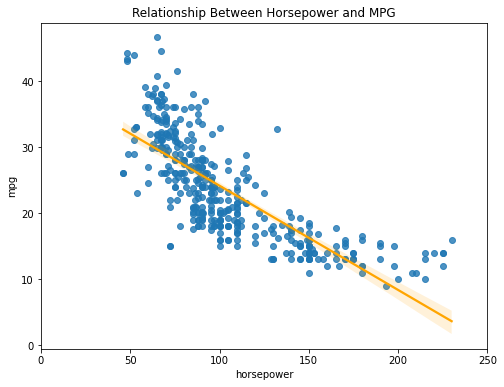

In [8]:
# Let's plot a simple linear regression line using just the horsepower column
plt.figure(figsize=(8, 6))
sns.regplot(x='horsepower', y='mpg', data=mpg_df, line_kws={"color":"orange"})
plt.title('Relationship Between Horsepower and MPG')
plt.xlim(0, 250)
plt.show()

The above graph shows an approximate best fit line for the relationship between `horsepower` and `mpg` in our data.


### 1) Describe the below chart: What is it showing? What does it tell us?

![Slope-RSS relationship image](images/slope-rss-relationship.png)

#### Answer: 

- Looking at cost function in respect to slope (coef)

This is a cost function which is an error, and we will use gradient descent to minimize it.
As we're going down, we're getting different values of error.
slope represents coefficient. Values of our coefficient.
It takes both predicted outputs by the model and actual outputs and calculates how much wrong the model was in its prediction.


### 2) Imagine that you're starting at a slope towards the top upper left corner. Using Zoom's annotate feature, demonstrate how gradient descent would work 

### 3) What is a step size when talking about gradient descent? How does learning rate regulate step size?

#### Answer: 

- Step size is how much you move down the cost function to find the minimal error. Step size is multiplied with the partial derivative.  Learning rate = alpha.  Gradient descent alpha * partial derivative. 

- The larger the alpha, the larger the step size.  Smaller the alpha, smaller the step size.  


## Part 2: Logistic Regression

### 4) Describe a logistic regression model:

- What kind of target is a logistic regression model used for?
- What are the predictions that a logistic regression model outputs?
- How is it different from linear regression?
- Is it a parametric or non-parametric model?

#### Answer: 

- Target is usually binary (could be multi-class) classification
- Predict returns class, predict proba returns probability of each class
- Linear regression measures continuous variables, where Logistic regression measures categorical variables
    - linear regression our loss function is RSS (residual of sum squares), logestic regression has log_loss and sigmoid 


### 5) Compare a logistic regression model to any of the other model types we've learned:

- List one benefit of logistic regression when compared to the other model type
- List one reason the other model type might be more useful

#### Answer: 

- The benefit of logistic regression is using gradient descent under the hood - it optimizes the coefficients of our features by minimizing our cost function.

- When compared to kNN because kNN does not use gradient descent 

- Another pro of logistic regression is that it is easy to interpret coefficients as related to log-odds of the target

- Another pro - it is not prone to overfitting compared to decision tree

- Cons - not robust to class imbalance in target

- Cons - similiar to logistic regression, it doesn't handle interaction between features very well

- Cons - prone to underfitting (inherent built in regularization)


## Part 3: Logistic Regression and Classification Metrics with Code

### Set Up

In [9]:
# Let's use the same data, but now with a classification target
mpg_class = pd.read_csv('data/auto-mpg-classification.csv')

In [10]:
# Check this new dataframe out
mpg_class.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,target
0,8,307.0,130,3504,12.0,70,1,0
1,8,350.0,165,3693,11.5,70,1,1
2,8,318.0,150,3436,11.0,70,1,0
3,8,304.0,150,3433,12.0,70,1,1
4,8,302.0,140,3449,10.5,70,1,1


### 6) Prepare our data for modeling:

1. Perform a train/test split
2. Scale the inputs


In [11]:
# Train-test split
# Set test_size=0.33 and random_state=42

X = mpg_class.drop(columns='target', axis = 1)
y = mpg_class['target']

X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)


In [12]:
# Scale the data

ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train)

X_test_scaled = ss.transform(X_test)

# we don't to fit on our test data to avoid data leakage

### 7) Explore the `target` column and our model-less baseline

1. What is the breakdown of the `target` column in our training data?
2. What would a model-less baseline look like in this context?
3. How accurate would that model-less understanding be on our test data?

#### Part 1: explore the target column breakdown in train data

In [13]:
# Code to explore

mpg_class['target'].value_counts(normalize=True)

0    0.747449
1    0.252551
Name: target, dtype: float64

In [14]:
## Do it using numpy 

np.bincount(y_train)

array([195,  67], dtype=int64)

#### Answer:

- We have a class imbalance, a dummy classifier would return an accuracy of 74% if our prediction always returned 0
                        - OR if we are always returning 1, we would return an accuracy of 25%



#### Part 2: What would a model-less baseline look like in this context?

#### Answer:

- a dummy classifier would return an accuracy of 74% if our prediction always returned 0
                        - OR if we are always returning 1, we would return an accuracy of 25%


#### Part 3: How accurate would that baseline be on test data?


In [15]:
# Code to find the answer

from sklearn.dummy import DummyClassifier
dumdum = DummyClassifier(strategy = 'most_frequent')
dumdum.fit(X_train_scaled, y_train)
dumdum.score(X_test_scaled, y_test)

0.7538461538461538

#### Answer:

- 


### 8) What is one problem you could foresee based on this breakdown, and what is one strategy you could employ to address that problem?

#### Answer:

- Target is imbalanced
- We could use SMOTE, by creating synthetic data by oversampling minority
- We also can adjust class_weight parameter 
- Why do you not want to undersample the majority?
    - Because we are losing a lot of data, throwing away 50%+ of data


### 9) Fit a logistic regression model, and plot a confusion matrix of the results on our test set

In [16]:
# Fit a logistic regression model
# Name the model `logreg` and set random_state = 42
logreg = LogisticRegression(random_state=42)

logreg.fit(X_train_scaled, y_train) #scaled because logreg is distanced based

LogisticRegression(random_state=42)

C:\Users\jsidd\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


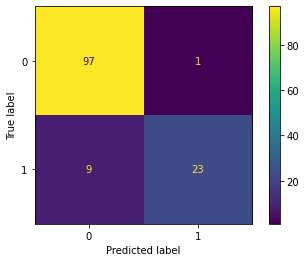

In [17]:
# Plot a confusion matrix on the test data

plot_confusion_matrix(logreg, X_test_scaled, y_test)

### 10) Calculate the accuracy, precision, recall and f1-score for the test set

You can use the confusion matrix above, or sklearn functions

$\begin{bmatrix}
TN & FP \\
FN & TP
\end{bmatrix}$

In [18]:
tn = 97
fp = 1
fn = 9
tp = 23


In [19]:
# Accuracy
acc = (tp + tn) / (tp + tn + fp + fn)
acc

0.9230769230769231

In [20]:
preds = logreg.predict(X_test_scaled)

In [21]:
# Accuracy using function - create predictions first (above cell)

acc2 = accuracy_score(y_test, preds)
acc2

0.9230769230769231

In [22]:
# Precision using function

prec2 = precision_score(y_test, preds)
prec2

0.9583333333333334

In [23]:
# Precision
prec = tp / (tp + fp)
prec

0.9583333333333334

In [24]:
# Recall
recall = tp / (tp + fn)
recall

0.71875

In [25]:
# Recall using function

recall2 = recall_score(y_test, preds)
recall2

0.71875

In [27]:
# F1-Score
f1_diff = 2*(prec*recall) / (prec + recall)
f1_diff

0.8214285714285714

In [28]:
# F1 score using function
f1 = f1_score(y_test, preds)
f1

0.8214285714285714

In [29]:
probs = logreg.predict_proba(X_test_scaled)

In [30]:
#Logloss is the logistic regression cost function
lg_loss = log_loss(y_test,probs)
lg_loss

0.17246330647509928

### 11) Calculate the ROC-AUC on the test set, and plot the ROC curve

For this you'll definitely want to use the sklearn functions!

In [31]:
# Calculate roc-auc
y_prob = logreg.predict_proba(X_test_scaled)

y_hat_bc = y_prob[:, 1]

roc_auc_score(y_test, y_hat_bc)

0.9811862244897959

In [32]:
# u can calculate roc-auc this way as well (of the class 1)

roc_auc_score(y_test, probs[:,1])

0.9811862244897959

C:\Users\jsidd\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


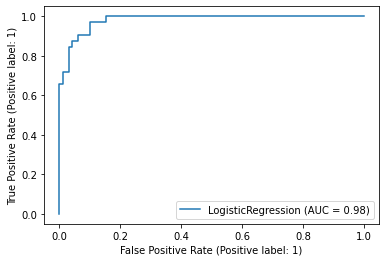

In [36]:
# Plot the ROC curve
plot_roc_curve(logreg, X_test_scaled, y_test)

### 12) Evaluate! Based on the metrics of our test data, how is our model doing?

In [43]:
f1, acc, recall, prec

(0.8214285714285714, 0.9230769230769231, 0.71875, 0.9583333333333334)

C:\Users\jsidd\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


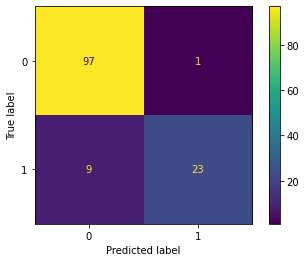

In [33]:
# Plot a confusion matrix on the test data

plot_confusion_matrix(logreg, X_test_scaled, y_test)

#### Answer:

- Better than the baseline accuracy, recall is low (we missed a lot of values that were actually 1 - we have false negatives)

- Basically, if we were predicting on cancer patients - this would indicate that our model missed 9 patients (look at confusion plot above - bottom left = false negatives) that actually had cancer AKA false negatives.


## Part 4: Decision Trees

### Set Up

NOTE! This code might not work for you! The images these generate are already prepopulated below because of that.

In [44]:
# Helper function from a colleague (h/t Bryan)
def plot_tree(dt, used_cols, out_file='mytree.dot'):
    export_graphviz(dt, out_file=out_file, 
                    filled=True, feature_names=used_cols, 
                    leaves_parallel=True, node_ids=True)
    with open(out_file) as f:
        dot_graph = f.read()
    return graphviz.Source(dot_graph)

In [45]:
# Creating two different decision trees with a single split
dt_maxdepth1_v1 = DecisionTreeClassifier(max_depth=1, random_state = 42)
dt_maxdepth1_v2 = DecisionTreeClassifier(max_depth=1, random_state = 42)

# Training the two trees on different columns
dt_maxdepth1_v1.fit(X_train[['weight']], y_train)
dt_maxdepth1_v2.fit(X_train[['origin']], y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

In [46]:
# Tree based on 1st column
plot_tree(dt_maxdepth1_v1, ['weight'])

NameError: name 'graphviz' is not defined

In [47]:
# Tree based on 2nd column
plot_tree(dt_maxdepth1_v2, ['origin'])

NameError: name 'graphviz' is not defined

#### Images:

| Version 1: Weight | Version 2: Origin |
| ----------------- | ----------------- |  
| ![max depth 1 - version 1](images/dt-maxdepth1-v1.png) | ![max depth 1 - version 2](images/dt-maxdepth1-v2.png) |

### 13) Which of these trees does a better job splitting the data? How can you tell?

#### Answer:

- Single decision with single split:
    - Based on the gini impurity, verision 1 (first tree) creates more pure nodes - it does a better job of splitting the data
            - lower gini scores implies better split
    - Could also look at the values [187,9] and [8,58] has a better split


### 14) Fit a decision tree model, and plot a confusion matrix of the results on our test set

In [48]:
# Fit a decision tree model
# Name the model `dt` and set random_state = 42
dt = DecisionTreeClassifier(random_state=42)

dt.fit(X_train, y_train) #No need to use scaled data here because decision trees are NOT distance based


DecisionTreeClassifier(random_state=42)

C:\Users\jsidd\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


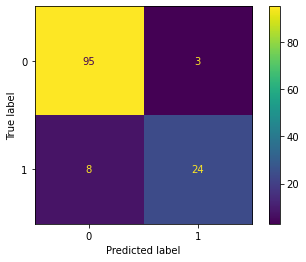

In [49]:
# Plot a confusion matrix on the test data

plot_confusion_matrix(dt, X_test, y_test)

C:\Users\jsidd\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\jsidd\anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\jsidd\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.w

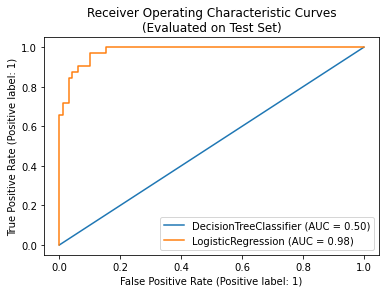

In [50]:
# Code to visualize the ROC curves for the models we've done
fig, ax = plt.subplots()
plot_roc_curve(dt, X_test_scaled, y_test, ax=ax)
plot_roc_curve(logreg, X_test_scaled, y_test, ax=ax)

plt.title("Receiver Operating Characteristic Curves\n(Evaluated on Test Set)")
plt.show()

### 15) Which is the better model according to ROC-AUC score? How can you tell?

#### Answer:

- Logistic Regression is performing  better with the AUC (area under the curve) is higher than the Decision Tree
